In [1]:
# Sciket-Learn API를 소개하고 사용법을 확인한다.
# 회귀, 분류와 같은 주요 머신러닝 모델을 직접 생성해 보고 절차를 살표본다.
# 머신러닝 데이터를 훈련용과 테스트용으로 나누는 목적과 방법을 이해한다.

★Scikit-Learn 라이브러리
 - 머신러닝 알고리즘을 구현한 오픈소스 라이브러리중 가장 유명한 라이브러리 중 하나.
 - 일관되고 간결한 API가 강점이며, 문서화가 잘되어 있음.
 - 알고리즘은 파이썬 클래스로 구현되고, 데이터 셋은 Numpy 배열, Pandas DataFrame, Scipy 희소행렬을 사용할 수 있음.
    
    

SyntaxError: invalid character in identifier (<ipython-input-1-6aebe691137c>, line 5)

In [3]:
import numpy as np

# Seed = RandomState
rs = np.random.RandomState(10)
x = 10 * rs.rand(5)
y = 2*x -1 * rs.rand(5)
x.shape, y.shape

((5,), (5,))

In [4]:
X = x.reshape(-1,1)
X.shape

(5, 1)

In [5]:
# iris로 Feature Matrix와 Target Vector를 분리한다.
import seaborn as sns
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# pandas의 DataFram으로, axis=1 열방향으로 species를 드랍 시켜라 즉, 4개의 열만 남겨라.
X = iris.drop("species", axis=1)
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
# 1차원 배열로 나타난다. pandas의 series
y = iris["species"]
y.shape

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [16]:
# Bunch 갤체를 이용한 특징 행렬(X), 대상벡터(y)의 생성
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
iris.data.shape

(150, 4)

In [29]:
# iris 결과 정보(종정보.)
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [30]:
X = iris.data; y=iris.target

In [31]:
★Scikit-Leartn Estimator API 기본 활용 절차
1.데이터 준비
2.모델 클래스 선택
3.모델 인스턴스 생성과 하이퍼파라미터 선택
4.특징 행렬과 대상 벡터 준비
5.모델을 데이터에 적합
6.새로운 데이터를 이용해 예측
7.모델 평가

SyntaxError: invalid character in identifier (<ipython-input-31-8efcc4068075>, line 1)

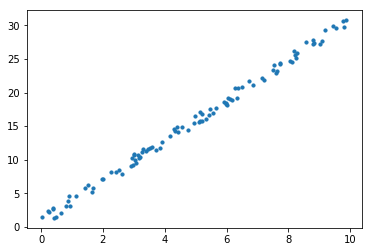

In [33]:
# 1. 데이터 준비
import numpy as np
import matplotlib.pyplot as plt

rs = np.random.RandomState(10)
x = 10 * rs.rand(100)
y = 3 * x + 2 * rs.rand(100)

plt.scatter(x, y, s=10)

In [36]:
# 2.모델 클래스 선택 = 선형모델(KubearRegresson)선택
# 3.모델 인스턴스 생서과 하이퍼파라미터 선택


from sklearn.linear_model import LinearRegression
regr = LinearRegression() #기본함수 함수 설정
regr = LinearRegression(fit_intercept=True) #함수 설정히 생성자 설정.


((100, 1), (100,))

In [37]:
# 4.특징 행렬과 대상 벡터 준비
X = x.reshape(-1,1)
X.shape, y.shape


((100, 1), (100,))

In [43]:
# 5.모델을 데이터에 적합

#이렇게 피팅을 해줘야 아래 coef_ 이런 함수들을 사용할 수 있다.
regr.fit(X,y) 
# 기울기 구하기, 코에피션트
regr.coef_, print(regr.coef_)
# y 절편 구하기, 이터셉트
regr.intercept_ , print(regr.intercept_)
# y = B0(기울기)X + B1(y절편)

[2.9855087]
0.9878534341975644


(0.9878534341975644, None)

In [47]:
# 6.새로운 데이터를 이용해 예측
# linespace는 (from, to, 개수)
x_new =np.linspace(-1, 11, num=100)

X_new = x_new.reshape(-1,1)
X_new.shape

(100, 1)

In [49]:
y_pred = regr.predict(X_new)
y_pred

array([-1.99765526, -1.63577542, -1.27389558, -0.91201574, -0.5501359 ,
       -0.18825605,  0.17362379,  0.53550363,  0.89738347,  1.25926332,
        1.62114316,  1.983023  ,  2.34490284,  2.70678268,  3.06866253,
        3.43054237,  3.79242221,  4.15430205,  4.5161819 ,  4.87806174,
        5.23994158,  5.60182142,  5.96370126,  6.32558111,  6.68746095,
        7.04934079,  7.41122063,  7.77310048,  8.13498032,  8.49686016,
        8.85874   ,  9.22061984,  9.58249969,  9.94437953, 10.30625937,
       10.66813921, 11.03001906, 11.3918989 , 11.75377874, 12.11565858,
       12.47753842, 12.83941827, 13.20129811, 13.56317795, 13.92505779,
       14.28693763, 14.64881748, 15.01069732, 15.37257716, 15.734457  ,
       16.09633685, 16.45821669, 16.82009653, 17.18197637, 17.54385621,
       17.90573606, 18.2676159 , 18.62949574, 18.99137558, 19.35325543,
       19.71513527, 20.07701511, 20.43889495, 20.80077479, 21.16265464,
       21.52453448, 21.88641432, 22.24829416, 22.61017401, 22.97

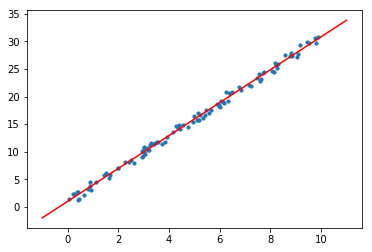

In [54]:
plt.plot(X_new, y_pred, c="red")
plt.scatter(x, y, s=10)

In [55]:
# 7.모델평가
# 회귀 => RMSE Root Mean Squared Error = 평균제곱 오차(실제값과 예측값의 제곱의 차.)
from sklearn.metrics import mean_squared_error

# y=실제값, y_pred=예측값 => root[(실제값 - 예측값)² / n ]
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse


13.708237122486333

In [68]:
# 훈련 데이터와 테스트 데이터
# iris데이터

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target
# print(X.shape, y.shape)
# print(X, y)

In [90]:
# KNN알고리즘 = 분류 알고리즘.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15) # n_neighbors 기본값 = 5, 

In [91]:
# 데이터 훈련 fit(적합화)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [92]:
# 데이터 예측 predict(예측화)
y_pred = knn.predict(X)

In [93]:
np.mean(y == y_pred)

0.9866666666666667

In [ ]:
# 훈련 데이터와 테스트 데이터와의 분리
 - 머신러닝 모델을 만들때 사용한 데이터는 모델의 성능측정용으로 사용하지 않음. => 일반화 문제.
 - 훈련데이터 => 머신러닝 모델을 만들 목적으로 사용.
 - 테스트 데이터 => 머신러닝 모델이 잘 작동하는지를 측정할 목적으로 사용.
 - scikit-learn의 train_test_split함수를 주로 사용 => 훈령용 75%, 테스트용 25%로 분리.

In [94]:
from sklearn.model_selection import train_test_split

# 훈련용 데이터 80%, 테스트 데이터 20% 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [95]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [98]:
y_pred = knn.predict(X_test)
y_pred, y_test

(array([0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
        1, 0, 0, 2, 1, 2, 2, 0]),
 array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
        1, 0, 0, 2, 1, 2, 2, 0]))

In [99]:
# 실제 값과 예측값 비교.
np.mean(y_test == y_pred)

0.9

In [100]:
# knn은 X_train과 y_train으로 이미 fit가 된상태이고, score를 통해 X_test, y_test를 집어 넣어 테스트 결과를 확인한다.
knn.score(X_test, y_test)

0.9

In [88]:
# 하이퍼 파라이터의 선택 n_neighbors
# 값을 여러개 주입하여 최적의 accuracy를 선택 한다.

train_accuracy = []
test_accuracy  = []
neighbors      = range(1, 101)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train)) #훈련 에큐어씨.
    test_accuracy.append(knn.score(X_test, y_test))    #테스트 에큐어씨.


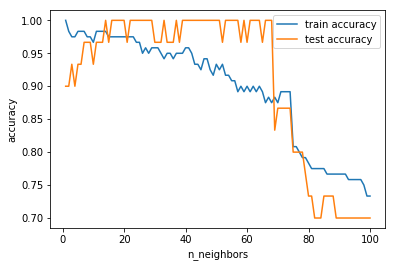

In [89]:
# train accuracy와 test accuracy값이 어느 정도 안정적, 일치하는 구간 7 ~ 9 로 보인다.
# 10개를 했을때는 7이 좋아 보이고, 100을 했을때는 16정도가 좋아 보임.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend();


In [24]:
iris.target.shape

(150,)